## Importing libraries and data and renaming columns

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [19]:
%matplotlib inline

In [20]:
# Importing Data
path = r'C:\Users\ztrim\07-2025 Boat Sales Analysis'

In [21]:
path

'C:\\Users\\ztrim\\07-2025 Boat Sales Analysis'

In [22]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col = False)

In [23]:
# Step 2: Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

# 2.1: Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
df_cluster = df[['Price', 'Length', 'Width', 'ViewsLast7Days']].copy()

In [24]:
# Drop rows with missing values in the selected columns 
df_cluster.dropna(inplace=True)

In [25]:
# Import StandardScaler because I am getting an error message
from sklearn.preprocessing import StandardScaler

In [26]:
# 2.2: Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [27]:
# Checking 
print("Data shape:", df_scaled.shape)

Data shape: (9534, 4)


In [28]:
pd.DataFrame(df_scaled, columns=df_cluster.columns).head()

,Price,Length,Width,ViewsLast7Days
0,-0.305687,-1.252584,-1.318002,0.490066
1,-0.305532,-1.252584,-1.647024,-0.493926
2,-0.305250,-1.304543,-1.712828,-0.174618
3,-0.282948,-1.420195,-2.058302,-0.565608
4,-0.305624,-1.328009,-1.679926,-0.604707


In [29]:
# Step 3: Use the elbow technique as shown in the Jupyter notebook for this Exercise.
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

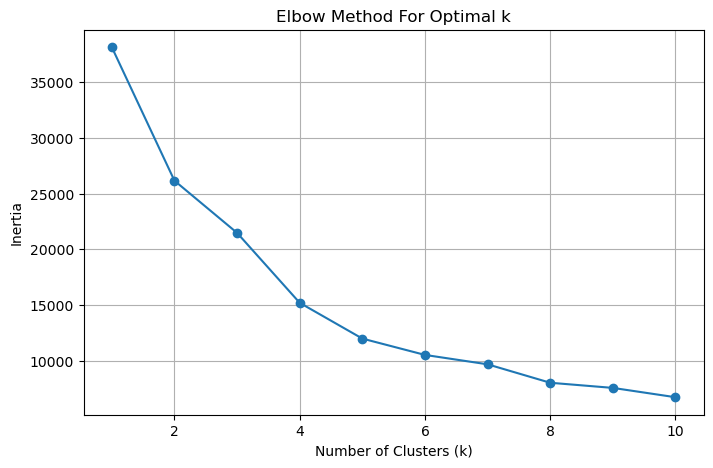

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [31]:
# Step 4: Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
# 4.1Explain why you chose that number in a markdown cell.

# I decided to use 4 clusters based on the elbow chart. The biggest drop in inertia happens between 1 and 4, and after that, the curve flattens out. 
# That means 4 is a good balance — it groups the data well without making the model too complex.

In [32]:
# Step 5:Run the k-means algorithm. (Using 4 clusters based on the elbow method above). 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [33]:
# Step 6: Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. 
# This will allow you to create a visualization using your clusters.
df_cluster['cluster'] = kmeans.labels_

In [34]:
# Check how it looks
df_cluster.head()

,Price,Length,Width,ViewsLast7Days,cluster
0,3337.0,4.00,1.90,226,1
1,3490.0,4.00,1.50,75,1
2,3770.0,3.69,1.42,124,1
3,25900.0,3.00,1.00,64,1
4,3399.0,3.55,1.46,58,1


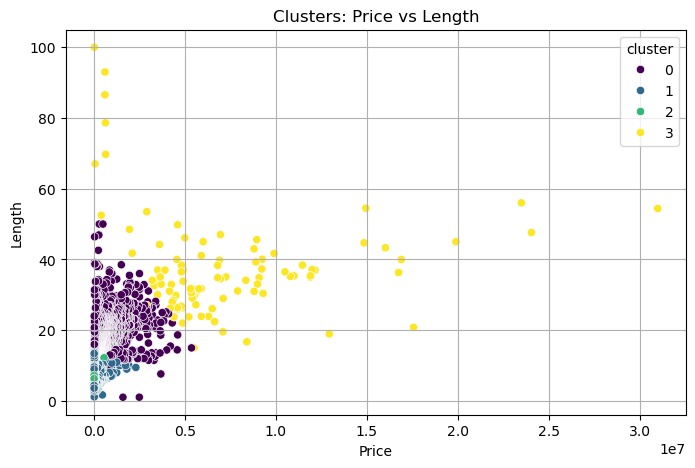

In [35]:
# Step 7: Create a few different visualizations (e.g., scatterplots) using your clustered data. 
# Try plotting different variables against each other to see the results in terms of the clusters.


# Plot 1: Price vs Length
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Length', hue='cluster', data=df_cluster, palette='viridis')
plt.title('Clusters: Price vs Length')
plt.grid(True)
plt.show()

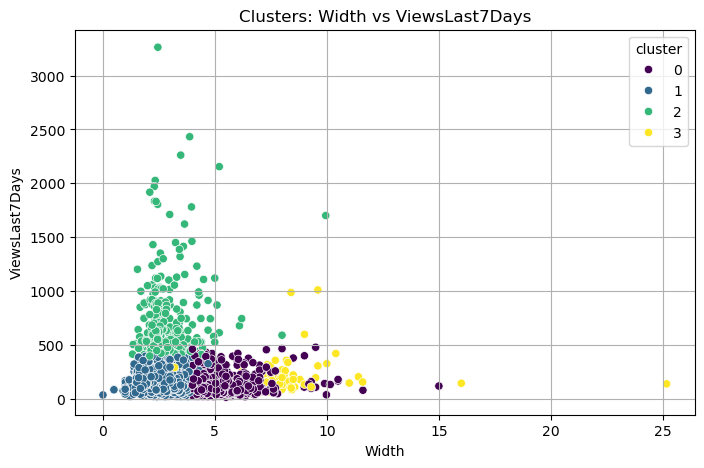

In [36]:
# Plot 2: Width vs ViewsLast7Days
plt.figure(figsize=(8,5))
sns.scatterplot(x='Width', y='ViewsLast7Days', hue='cluster', data=df_cluster, palette='viridis')
plt.title('Clusters: Width vs ViewsLast7Days')
plt.grid(True)
plt.show()

In [38]:
# Step 8: Discuss how and why the clusters make sense. If they don’t make sense, however, 
# this is also useful insight, as it means you’ll need to explore the data further.

# The clusters mostly make sense when looking at the scatterplots. In the first one the yellow cluster stands out, it includes boats that are longer and more expensive. The other clusters stay closer together in price and size, but they’re still separated.
# In the second plot, there’s a group with high view counts, especially in the green cluster. This could mean those boats are more popular. Some clusters also show wider boats getting fewer views.
# Seems like the model has picked up some patterns, like size or interest level. There’s still some overlap, but the clusters seem to reflect different types of boat listings.

In [42]:
# Step 9: Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
df_cluster.groupby('cluster').mean(numeric_only=True)

,Price,Length,Width,ViewsLast7Days
cluster,,,,
0,5.085980e+05,16.600569,4.674589,101.499541
1,8.565900e+04,8.320128,2.809240,139.109088
2,8.510948e+04,8.430819,2.820288,649.831858
3,7.324814e+06,37.578700,7.822400,175.100000


In [43]:
# Discuss the findings
# The cluster averages show clear differences between the groups. These results suggest that boat size and price don’t always match how many people are viewing the listing,
# some smaller boats might be more popular depending on other factors like brand or location.

In [44]:
# Step 10: Propose what these results could be useful for in future steps of an analytics pipeline.

# These clusters could help group boats into types like budget or luxury. 
# This might be useful later for marketing, price suggestions, or understanding which boats get more interest.